# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [3]:
facts.columns

Index(['State', 'Area_tot', 'Area_land', 'Area_water', 'Pop_2020', 'Pop_2010',
       'Rep_seats', 'State_bird', 'State_flower', 'State_motto', 'Motto_trans',
       'USPS_code', 'GDP_2020', 'GDP_2019', 'Capital', 'Capital_pop', 'City_1',
       'city_1_pop', 'City_2', 'city_2_pop', 'City_3', 'city_3_pop', 'City_4',
       'city_4_pop', 'City_5', 'city_5_pop'],
      dtype='object')

In [18]:
#Which entities (top 5) had the largest population density in 2020?
facts['Density'] = facts['Pop_2020'] / facts['Area_land']
bigPop = facts.sort_values(by='Density',ascending=False)
top5Pop = bigPop.head(5)
top5Pop

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Pop_drop
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861,NaN
32,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,Jersey City,265549.0,Paterson,145627.0,Elizabeth,128885.0,Edison,100008.0,487.688035,182082.0
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,Cranston,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,409.775579,132407.0
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,Bayamón,170480.0,Carolina,147661.0,Ponce,133191.0,Caguas,124434.0,370.531574,270892.0
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239,580930.0


In [19]:
#Which entities (top 5) had the largest population density in 2020?
moreWater = facts[(facts['Area_water'] > facts['Area_land'])]
moreWater

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Pop_drop
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818,5495.0
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129,36068.0
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051,NaN
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,305.272989,15204.0


In [21]:
#Which entities increased in population the most in the last 10 years?
popIncrease = facts[(facts['Pop_2020'] > facts['Pop_2010'])]
popIncrease['Change_pop'] = facts['Pop_2020'] - facts['Pop_2010']
popIncrease =  popIncrease.sort_values(by='Change_pop',ascending=False)# all states with increased population sorted in decending order
top5PopIncrease = popIncrease.head(5) # get top 5
top5PopIncrease

/tmp/ipykernel_1587726/588566965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popIncrease['Change_pop'] = facts['Pop_2020'] - facts['Pop_2010']


,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Pop_drop,Change_pop
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,43.077247,1422564.0,3999944.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0,155.077055,642855.0,2736877.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,97.996419,3467891.0,2284267.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,359630.0,1024255.0
52,Washington,184661,172119,12542,7705281.0,6724540,10,Willow goldfinch (American goldfinch),Coast rhododendron,Al-ki,...,219190.0,Tacoma,216279.0,Vancouver,183012.0,Bellevue,147599.0,44.767173,606968.0,980741.0


In [7]:
#What state bird accounts for the largest population as of 2020?
facts.groupby(by='State_bird').sum().sort_values(by='Pop_2020',ascending=False).head(1)

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Density
State_bird,,,,,,,,,,,,,,
Northern mockingbird,1238297,1178574,59722,63567335.0,56176191,3463383.0,3573810.6,2202168,4262215,2818895.0,2087169.0,1575653.0,1454625.0,309.575693


In [8]:
#What state bird accounts for the largest land area as of 2020?
facts.groupby(by='State_bird').sum().sort_values(by='Area_land',ascending=False).head(1)

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Density
State_bird,,,,,,,,,,,,,,
Willow ptarmigan,1723337,1477953,245384,733391.0,710231,50246.7,54385.6,32113,291538,32113.0,31516.0,10529.0,8647.0,0.496221


In [28]:
#How many entities' largest city is their capital city?
facts[facts['Capital'] == facts['City_1']]
#There are 17 states with their capital city as their largest city

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Pop_drop
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,24.307722,1425682.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,22.345490,120322.0
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Colorado Springs,483829.0,Aurora,374114.0,Fort Collins,167830.0,Lakewood,156798.0,21.509118,570413.0
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861,NaN
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,Augusta,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,359630.0
14,Idaho,216443,214045,2398,1839106.0,1567582,2,Mountain bluebird,"Syringa, mock orange",Esto perpetua,...,Meridian,106894.0,Nampa,96252.0,Idaho Falls,63398.0,Caldwell,56541.0,8.592147,172418.0
16,Indiana,94326,92789,1537,6785528.0,6483802,9,Northern cardinal,Peony,The crossroads of America,...,Fort Wayne,267633.0,Evansville,117963.0,South Bend,103290.0,Carmel,99329.0,73.128582,777055.0
17,Iowa,145746,144669,1077,3190369.0,3046355,4,Eastern goldfinch (American goldfinch),Wild rose,Our liberties we prize and our rights we will ...,...,Cedar Rapids,133174.0,Davenport,102085.0,Sioux City,82396.0,Iowa City,76290.0,22.052886,137947.0
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239,580930.0
26,Mississippi,125438,121531,3907,2961279.0,2967297,4,Northern mockingbird,Magnolia,Virtute et armis,...,Gulfport,71870.0,Southaven,54944.0,Biloxi,45968.0,Hattiesburg,45951.0,24.366450,114677.0


In [36]:
#Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

facts['Percent_change'] = 100*(facts['city_1_pop'] - facts['city_5_pop'])/(facts['city_1_pop'])
change = facts.sort_values(by='Percent_change',ascending=False)
mostChange = change.head(1)
mostChange
# The state with the largest percent drop from 1st to 5th is New York

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Pop_drop,Percent_change
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,165.506681,8737179.0,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [11]:
#merge data sets
info = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
combined = pd.merge(info,dates, left_on="USPS_code", right_on="Abbreviation", how = 'outer').drop(columns=['Name'])

In [38]:
#convert Date to datetime
combined['Date_Fixed'] = pd.to_datetime(combined['Date'],errors='raise')

#Of the states that joined the United States before 1790, what is the most common state flower?
earlyStates = combined[combined['Date_Fixed'] < pd.datetime(1790,1,1)]
stateByFlower = earlyStates["State_flower"].value_counts().head(1)
stateByFlower

/tmp/ipykernel_1587726/3722301887.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  earlyStates = combined[combined['Date_Fixed'] < pd.datetime(1790,1,1)]


Mountain laurel    2
Name: State_flower, dtype: int64

In [13]:
#Which has the larger population density, the most dense US Territory or the least dense state?
onlyTerritory = combined[combined['Status'] == 'Territory']
onlyTerritory['Density'] = onlyTerritory['Pop_2020'] / onlyTerritory['Area_land']
denseTerritory = onlyTerritory.sort_values(by='Density',ascending=False).head(1) # get most dense territory
onlyState = combined[combined['Status'] == 'State']
onlyState['Density'] = onlyState['Pop_2020'] / onlyState['Area_land']
denseState = onlyState.sort_values(by='Density',ascending=False).tail(1) # get least dense state
print(denseTerritory)
print(denseState)
print("The density of the least dense state (Alaska) is .0496221 while the density of the most dense territory (Puerto Rico) is 370.531574. Therefore, the most dense Territory is more dense than the least dense State.")

            State  Area_tot  Area_land  Area_water   Pop_2020  Pop_2010  \
42   Puerto Rico      13791       8868        4924  3285874.0   3725789   

   Rep_seats State_bird   State_flower              State_motto  ...  \
42       1*       None   Flor de Maga   Joannes Est Nomen Eius   ...   

   city_3_pop  City_4  city_4_pop   City_5 city_5_pop            Date  \
42   147661.0  Ponce     133191.0  Caguas    124434.0  April 11, 1899   

       Status  Abbreviation Date_Fixed     Density  
42  Territory            PR 1899-04-11  370.531574  

[1 rows x 31 columns]
      State  Area_tot  Area_land  Area_water  Pop_2020  Pop_2010 Rep_seats  \
1   Alaska    1723337    1477953      245384  733391.0    710231         1   

          State_bird    State_flower           State_motto  ... city_3_pop  \
1  Willow ptarmigan   Forget-me-not   North to the Future   ...    31516.0   

     City_4  city_4_pop  City_5 city_5_pop             Date Status  \
1  Wasilla      10529.0  Sitka      8647.0  

/tmp/ipykernel_1587726/3836427308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlyTerritory['Density'] = onlyTerritory['Pop_2020'] / onlyTerritory['Area_land']
/tmp/ipykernel_1587726/3836427308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlyState['Density'] = onlyState['Pop_2020'] / onlyState['Area_land']


In [14]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

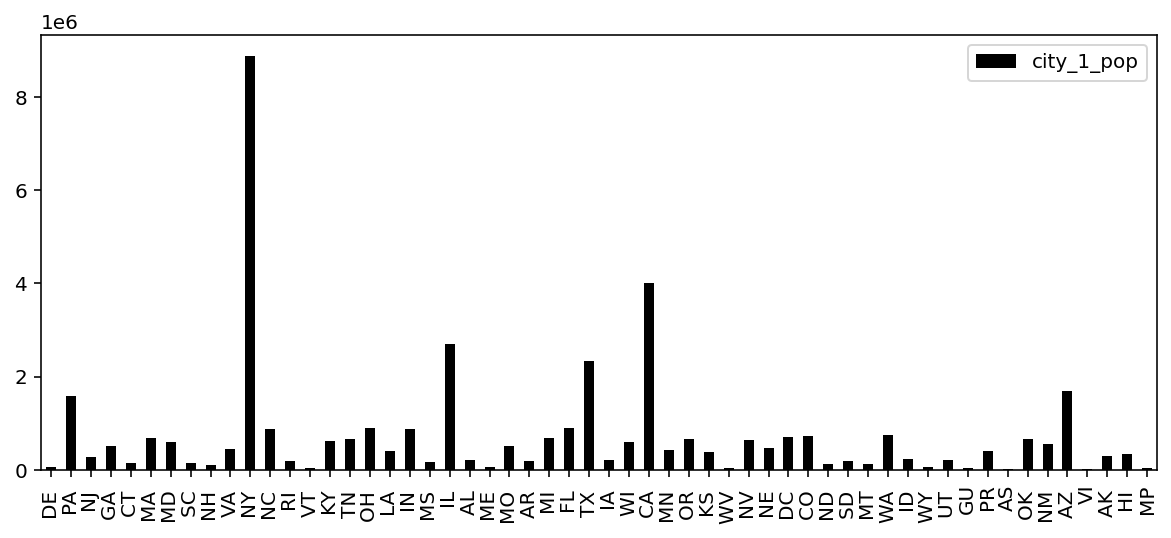

In [15]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

dfByDate = combined.sort_values(by='Date_Fixed',ascending=True)
plot = dfByDate[['city_1_pop','Abbreviation']].plot(kind='bar',figsize=(10,4), color = 'black')
plot.set_xticklabels(dfByDate['Abbreviation']);

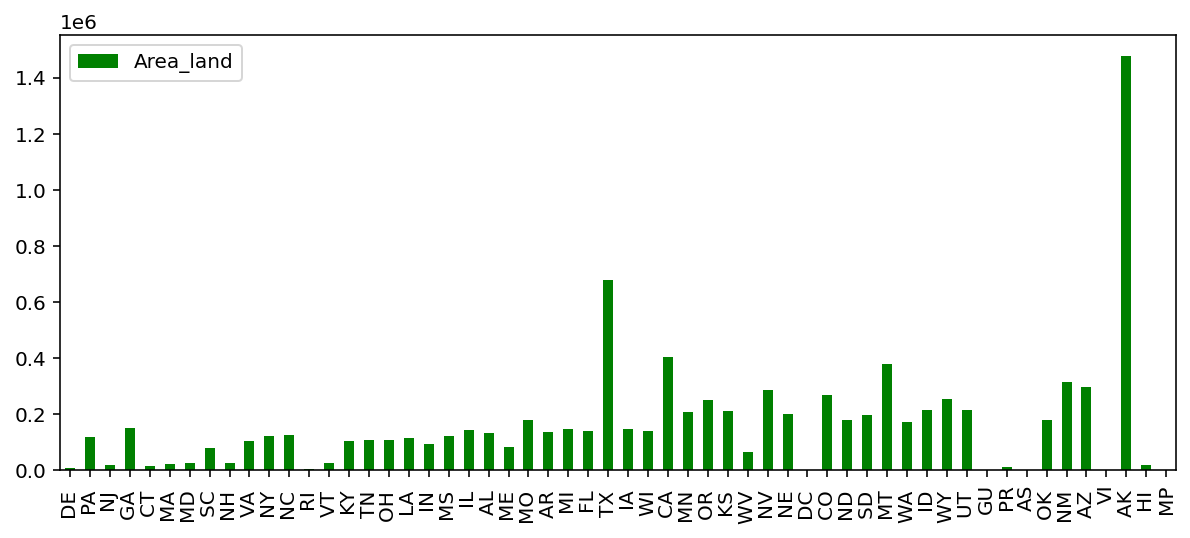

In [16]:
#Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)
plot = dfByDate[['Area_land','Abbreviation']].plot(kind='bar',figsize=(10,4), color = 'green')
plot.set_xticklabels(dfByDate['Abbreviation']);

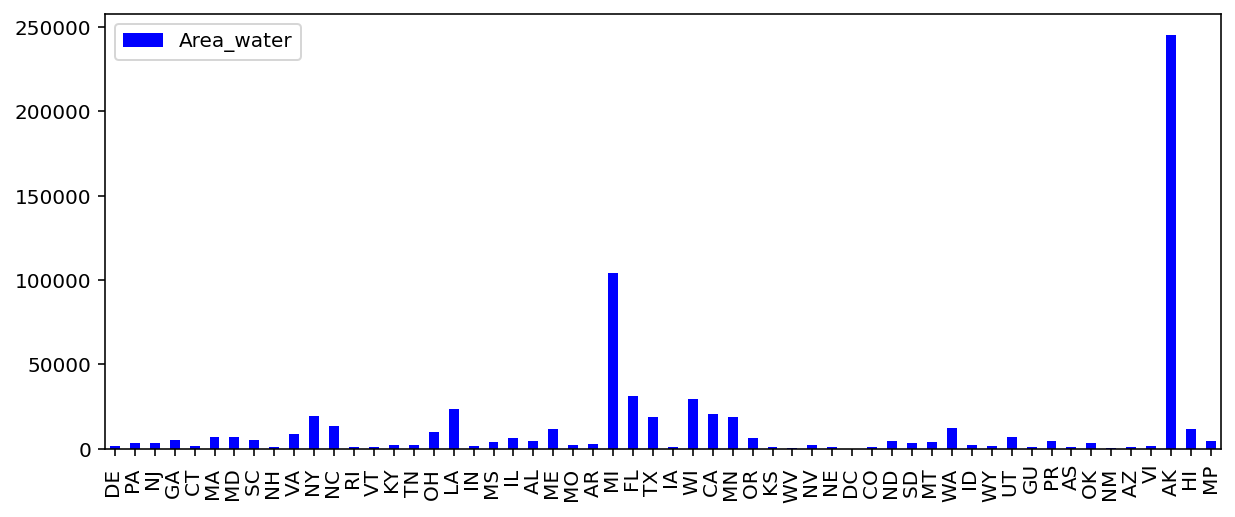

In [17]:
plot = dfByDate[['Area_water','Abbreviation']].plot(kind='bar',figsize=(10,4), color = 'blue')
plot.set_xticklabels(dfByDate['Abbreviation']);